kmeans
dataset's batch 20
data's batch 50

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from psc_firework import PSC
import time
import torch
import random

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

df = pd.read_csv('firework.csv')
print(df.head(10))
action = {'allow': 1, 'deny': 2, 'drop': 3, 'reset-both': 4}
df['Action'] = df['Action'].map(action)
y = df['Action'].values
print(y)
x_data = df.drop(['Action'], axis = 1).values
# x_data = df.drop(['Action', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'], axis = 1).values
print(x_data)
print("x_data type", type(x_data))
print("y type", type(y))
print("x_data shape", x_data.shape)
print("y shape", y.shape)

scaler = sklearn.preprocessing.StandardScaler().fit(x_data)
x = scaler.transform(x_data)
# x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
print(x)
print("x shape ", x.shape)

class Net1(nn.Module):
    def __init__(self, out):
        super(Net1, self).__init__()
        self.output = out
        # Define the layers
        self.fc1 = nn.Linear(11, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, self.output)

        self.relu = nn.ReLU()

    def forward(self, x):

        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.output_layer(x)
        return x


   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   
5        51465               443            39975                   443   
6        60513             47094            45469                 47094   
7        50049               443            21285                   443   
8        52244             58774             2211                 58774   
9        50627               443            16215                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768       

In [2]:
silhouette_avg_kmeans = []
calinski_harabasz_kmeans = []
homogeneity_kmeans = []
v_measure_kmeans = []
# Davies-Boulding
for i in range(2, 22, 2):
    print(f"n_clusters = {i}")
    model = Net1(out=i)
    kmeans = KMeans(n_clusters=4, init='random', n_init='auto', algorithm='elkan')
    time1 = round(time.time()*1000)
    x_fit_kmeans = kmeans.fit(x)
    x_predict_kmeans = kmeans.predict(x)
    time2 = round(time.time()*1000)
    print(f"PSC time spent: {time2 - time1} milliseconds")
    silhouette_avg_kmeans.append(metrics.silhouette_score(x, x_fit_kmeans.labels_))
    print(f"silhouette_avg: {silhouette_avg_kmeans[-1]}")
    calinski_harabasz_kmeans.append(metrics.calinski_harabasz_score(x, x_fit_kmeans.labels_))
    print(f"calinski_harabasz: {calinski_harabasz_kmeans[-1]}")
    homogeneity_kmeans.append(metrics.homogeneity_score(y, x_predict_kmeans))
    print(f"homogeneity: {homogeneity_kmeans[-1]}")
    v_measure_kmeans.append(metrics.v_measure_score(y, x_predict_kmeans))
    print(f"v_measure: {v_measure_kmeans[-1]}\n")

n_clusters = 2
PSC time spent: 408 milliseconds
silhouette_avg: 0.4267210699596907
calinski_harabasz: 7606.574164388027
homogeneity: 0.48311172418529047
v_measure: 0.4340468454926465

n_clusters = 4
PSC time spent: 672 milliseconds
silhouette_avg: 0.42675682460066594
calinski_harabasz: 7606.564876585677
homogeneity: 0.4831287540790042
v_measure: 0.43404821205671196

n_clusters = 6
PSC time spent: 638 milliseconds
silhouette_avg: 0.42673816748224463
calinski_harabasz: 7606.57479691551
homogeneity: 0.4829901693997612
v_measure: 0.4339426682705738

n_clusters = 8
PSC time spent: 656 milliseconds
silhouette_avg: 0.37500181431376817
calinski_harabasz: 22328.325368284648
homogeneity: 0.37877346038333676
v_measure: 0.36436392236272513

n_clusters = 10
PSC time spent: 772 milliseconds
silhouette_avg: 0.4267127096416677
calinski_harabasz: 7606.572383372681
homogeneity: 0.482860110549201
v_measure: 0.43383344556478093

n_clusters = 12
PSC time spent: 661 milliseconds
silhouette_avg: 0.4267323224

[0.4267210699596907, 0.42675682460066594, 0.42673816748224463, 0.37500181431376817, 0.4267127096416677, 0.42673232242438736, 0.4669614465993183, 0.42671335435935076, 0.42671953548091324, 0.42671335435935076]


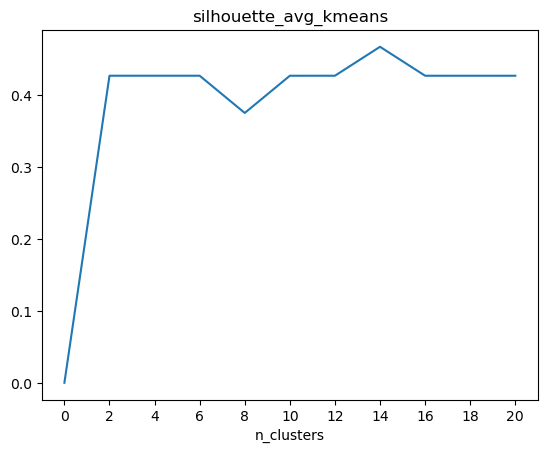

In [3]:
print(silhouette_avg_kmeans)
plt.title("silhouette_avg_kmeans")
plt.xlabel("n_clusters")
xx = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
silhouette_avg_kmeans.insert(0, 0)
plt.xticks(ticks=range(0, 11), labels=xx)
plt.plot(silhouette_avg_kmeans)

[7606.574164388027, 7606.564876585677, 7606.57479691551, 22328.325368284648, 7606.572383372681, 7606.574884720522, 7717.458213883137, 7606.571769129487, 7606.574793761457, 7606.571769129487]


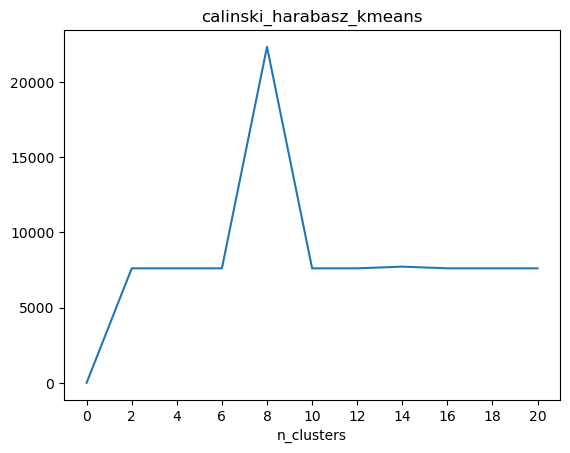

In [4]:
print(calinski_harabasz_kmeans)
plt.title("calinski_harabasz_kmeans")
plt.xlabel("n_clusters")
xx = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
calinski_harabasz_kmeans.insert(0, 0)
plt.xticks(ticks=range(0, 11), labels=xx)
plt.plot(calinski_harabasz_kmeans)

[0.48311172418529047, 0.4831287540790042, 0.4829901693997612, 0.37877346038333676, 0.482860110549201, 0.48303398982528095, 0.3357762056747653, 0.48283805760519777, 0.4831437594574876, 0.4828380576051979]


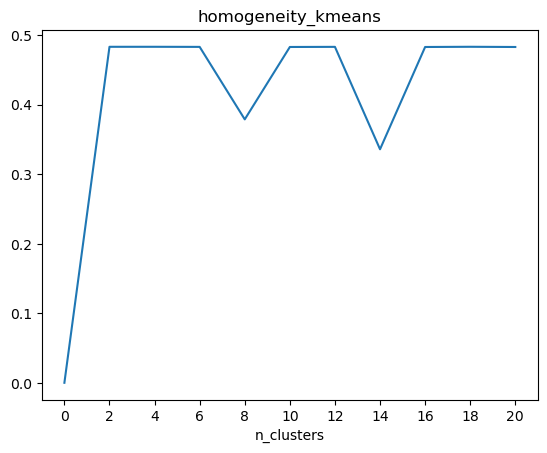

In [5]:
print(homogeneity_kmeans)
plt.title("homogeneity_kmeans")
plt.xlabel("n_clusters")
xx = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
homogeneity_kmeans.insert(0, 0)
plt.xticks(ticks=range(0, 11), labels=xx)
plt.plot(homogeneity_kmeans)

[0.4340468454926465, 0.43404821205671196, 0.4339426682705738, 0.36436392236272513, 0.43383344556478093, 0.4339793989883429, 0.38462404270636485, 0.43381087457778705, 0.4340755040749403, 0.4338108745777871]


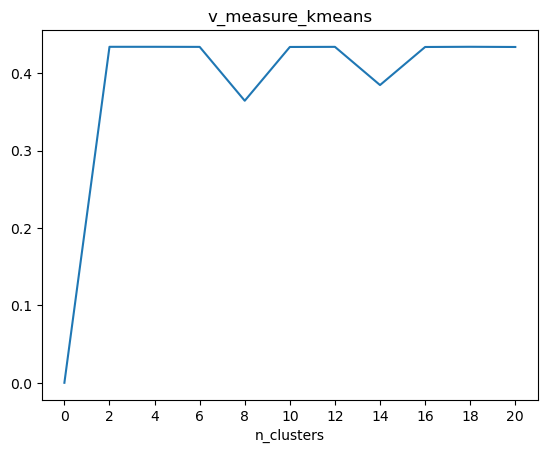

In [6]:
print(v_measure_kmeans)
plt.title("v_measure_kmeans")
plt.xlabel("n_clusters")
xx = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
v_measure_kmeans.insert(0, 0)
plt.xticks(ticks=range(0, 11), labels=xx)
plt.plot(v_measure_kmeans)